Unsupervised learning

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
data =pd.read_csv('C:\\Users\\Lumia520\\Desktop\\Datasets\\income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Make scatterplot to visulatize potential clusters

<Axes: xlabel='Age', ylabel='Income($)'>

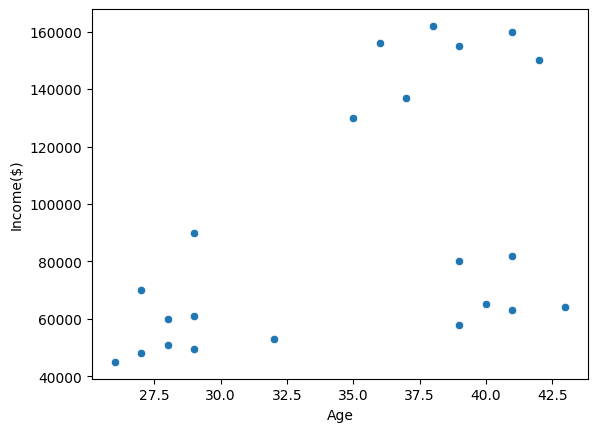

In [4]:
sns.scatterplot(data, x = 'Age', y = 'Income($)')

In [6]:
km = KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(data[['Age', 'Income($)']])
y_predicted

c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

now to visualize these predicted values

In [10]:
data['cluster'] = y_predicted

In [11]:
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


<Axes: xlabel='Age', ylabel='Income($)'>

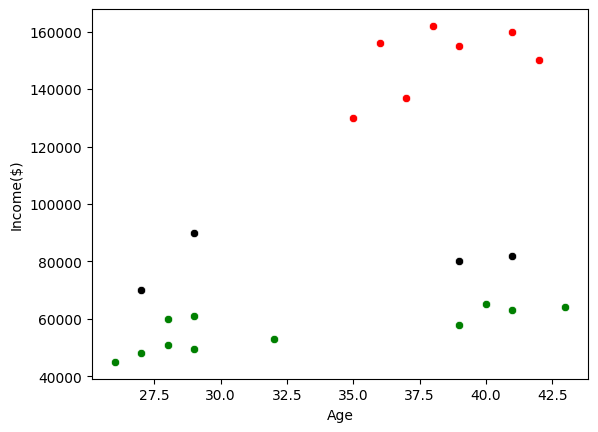

In [17]:
data0 = data[data.cluster == 0]
data1 = data[data.cluster == 1]
data2 = data[data.cluster == 2]

sns.scatterplot(data0, x = 'Age', y = 'Income($)', color = 'green')
sns.scatterplot(data1, x = 'Age', y = 'Income($)', color = 'red')
sns.scatterplot(data2, x = 'Age', y = 'Income($)', color = 'black')

there is a problem in scaling so we fix it with min max scaler to scale both axes between 0 and 1

In [35]:
scaler = MinMaxScaler()
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data.Age = scaler.transform(data[['Age']])
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


using k means algorithm again to train our scaled dataset

In [36]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age', 'Income($)']])
y_predicted

c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [37]:
data['cluster'] = y_predicted

In [38]:
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


<Axes: xlabel='Age', ylabel='Income($)'>

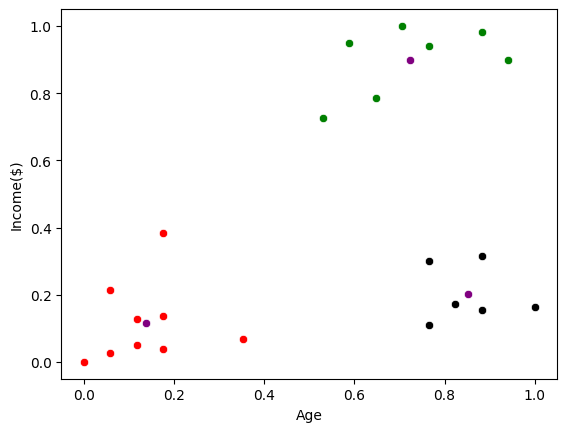

In [42]:
data0 = data[data.cluster == 0]
data1 = data[data.cluster == 1]
data2 = data[data.cluster == 2]

sns.scatterplot(data0, x = 'Age', y = 'Income($)', color = 'green')
sns.scatterplot(data1, x = 'Age', y = 'Income($)', color = 'red')
sns.scatterplot(data2, x = 'Age', y = 'Income($)', color = 'black')
sns.scatterplot(x = km.cluster_centers_[:,0], y = km.cluster_centers_[:,1], color = 'purple', markers='*')

Now we have proper clusters

to checkout the centroids

In [40]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

to plot the elbow graph for this model

In [43]:
k_rng = range(1,10)
sse = []           #sum of squared errors
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age', 'Income($)']])
    sse.append(km.inertia_)        # inertia will give sse

c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lumia520\AppData\Local\Programs\Python\Python311\Lib\site-packages\

In [44]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2621792762345213,
 0.21055478995472487,
 0.17681044133887713,
 0.14087951725103115,
 0.10383752586603559]

<Axes: >

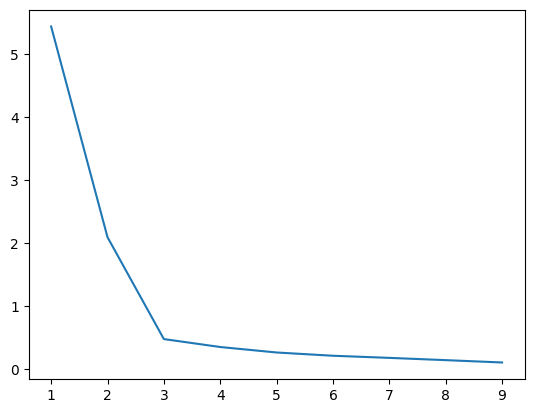

In [46]:
sns.lineplot(x = k_rng, y = sse)

elbow is at 3